In [ ]:
!git clone https://github.com/jmsaavedrar/machine_learning
import sys
sys.path.append('/content/machine_learning')
import numpy as np
import nn.perceptron as perceptron
import sklearn.datasets as datasets
import metrics.metrics as metrics
import matplotlib.pyplot as plt
iris = datasets.load_iris()
X = iris.data[:100,1:3]
y = iris.target[:100:]

n = X.shape[0]
n_test = int(np.rint(0.2 * n))

# random sort
idx = np.random.permutation(n)
X = X[idx]
y = y[idx]

X_train = X[:-n_test]
X_test = X[-n_test:]
y_train = y[:-n_test]
y_test = y[-n_test:]

""" data normalization, improve convergence """
mu = np.mean(X_train, axis = 0)
dst = np.std(X_train, axis = 0)
X_train = (X_train - mu) / dst
X_test = (X_test - mu) / dst
print('train: {}'.format(X_train.shape))
print('val: {}'.format(X_test.shape))

fatal: destination path 'machine_learning' already exists and is not an empty directory.
train: (80, 2)
val: (20, 2)


In [ ]:
"""-------------------------------------------"""
#Logistic Regression
model = perceptron.Perceptron()
model.setLoss('mse')
model.setSteps(50)
model.setPrintSteps(1)


coeff = model.fit(X_train, y_train)
#Evaluation (accuracy x clase)
y_pred =model.predict(X_test)


acc= metrics.accuracy(np.expand_dims(y_test, axis = 1) , y_pred)
print('Acc Test {}'.format(acc))



it 0 mse loss_bce 0.7192699043760953 loss_mse 0.2630222838314205
it 0 acc 0.3375
it 1 mse loss_bce 0.7106630667597807 loss_mse 0.2587309584602616
it 1 acc 0.4
it 2 mse loss_bce 0.7022129892826043 loss_mse 0.254517771666822
it 2 acc 0.4375
it 3 mse loss_bce 0.6939181597805509 loss_mse 0.2503826822819609
it 3 acc 0.5
it 4 mse loss_bce 0.6857769330806931 loss_mse 0.24632551621967574
it 4 acc 0.55
it 5 mse loss_bce 0.6777875427644028 loss_mse 0.24234597504661187
it 5 acc 0.575
it 6 mse loss_bce 0.6699481127012383 loss_mse 0.23844364462276815
it 6 acc 0.6625
it 7 mse loss_bce 0.6622566682878872 loss_mse 0.2346180037336012
it 7 acc 0.725
it 8 mse loss_bce 0.6547111473360194 loss_mse 0.23086843264213225
it 8 acc 0.725
it 9 mse loss_bce 0.6473094105620978 loss_mse 0.22719422149817065
it 9 acc 0.8
it 10 mse loss_bce 0.6400492516409837 loss_mse 0.22359457855021336
it 10 acc 0.8125
it 11 mse loss_bce 0.6329284067934509 loss_mse 0.22006863811379312
it 11 acc 0.825
it 12 mse loss_bce 0.625944563885

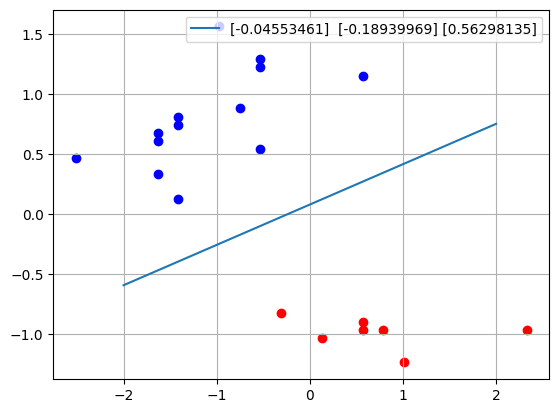

In [56]:
#--- view
plt.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], color = 'red')
plt.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], color = 'blue')
x1 = np.linspace(-2, 2, 400)
x2 = - (coeff[0] + coeff[1]*x1) /coeff[2]
plt.plot(x1, x2, label = f'{coeff[0]}  {coeff[1]} {coeff[2]}')
plt.grid(True)
plt.legend()
plt.show()